# This Notebook contains the code used to create visualizations _ & _ 
- We begin my importing our dependencies and then loading the data frame created in the Title Rating API Notebook. This dataframe is a breakdown of Netflix Titles and their corresponding genre, rating, and IMDB rating. 


In [1]:
#import dependencies to read the files 
import os 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
import requests

In [2]:
# File to Load
file_to_load = "../Data/Title Genre Rating.csv"

# Read Purchasing File and store into Pandas data frame
imdb_genre_df = pd.read_csv(file_to_load)

In [3]:
#ensure all missing values are drop
imdb_genre_df= imdb_genre_df.dropna()

In [4]:
imdb_genre_df.to_csv("Movie IMDB Rating.csv", index= False)

In [5]:
#dispose of any repeat titles
imdb_genre_df= imdb_genre_df.drop_duplicates(subset= 'Title')

In [6]:
#Split the genre column by delimiter ',' and only keep the first genre listed 
imdb_genre_df['Genres'] = imdb_genre_df['Genre'].str.split(',').str[0]
del imdb_genre_df['Genre']
imdb_genre_df

,Title,IMDB Rating,Rating,Genres
1,23:59,4.6,R,Horror
2,9,7.1,PG-13,Animation
3,21,6.8,PG-13,Crime
4,46,7.4,Not Rated,Short
7,706,5.3,Not Rated,Thriller
...,...,...,...,...
4093,Zodiac,7.7,R,Crime
4094,Zokkomon,4.1,PG,Action
4095,Zombieland,7.6,R,Adventure
4096,Zoo,6.7,TV-14,Drama


In [7]:
#clean the data some more by deleting genres that were poorly represented 
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('News')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('History')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Game-Show')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Adult')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Reality-TV')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Western')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sci-Fi')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Musical')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sport')]

In [8]:
#Do a groupby function to find each genre's average IMDB rating
groups= imdb_genre_df.groupby("Genres").mean()
groups = groups.sort_values(["IMDB Rating"], ascending=False)
groups

,IMDB Rating
Genres,
Music,7.480000
Documentary,7.031651
Biography,6.980488
Short,6.790909
Crime,6.469945
Drama,6.455010
Animation,6.305528
Comedy,6.216645
Adventure,6.186667


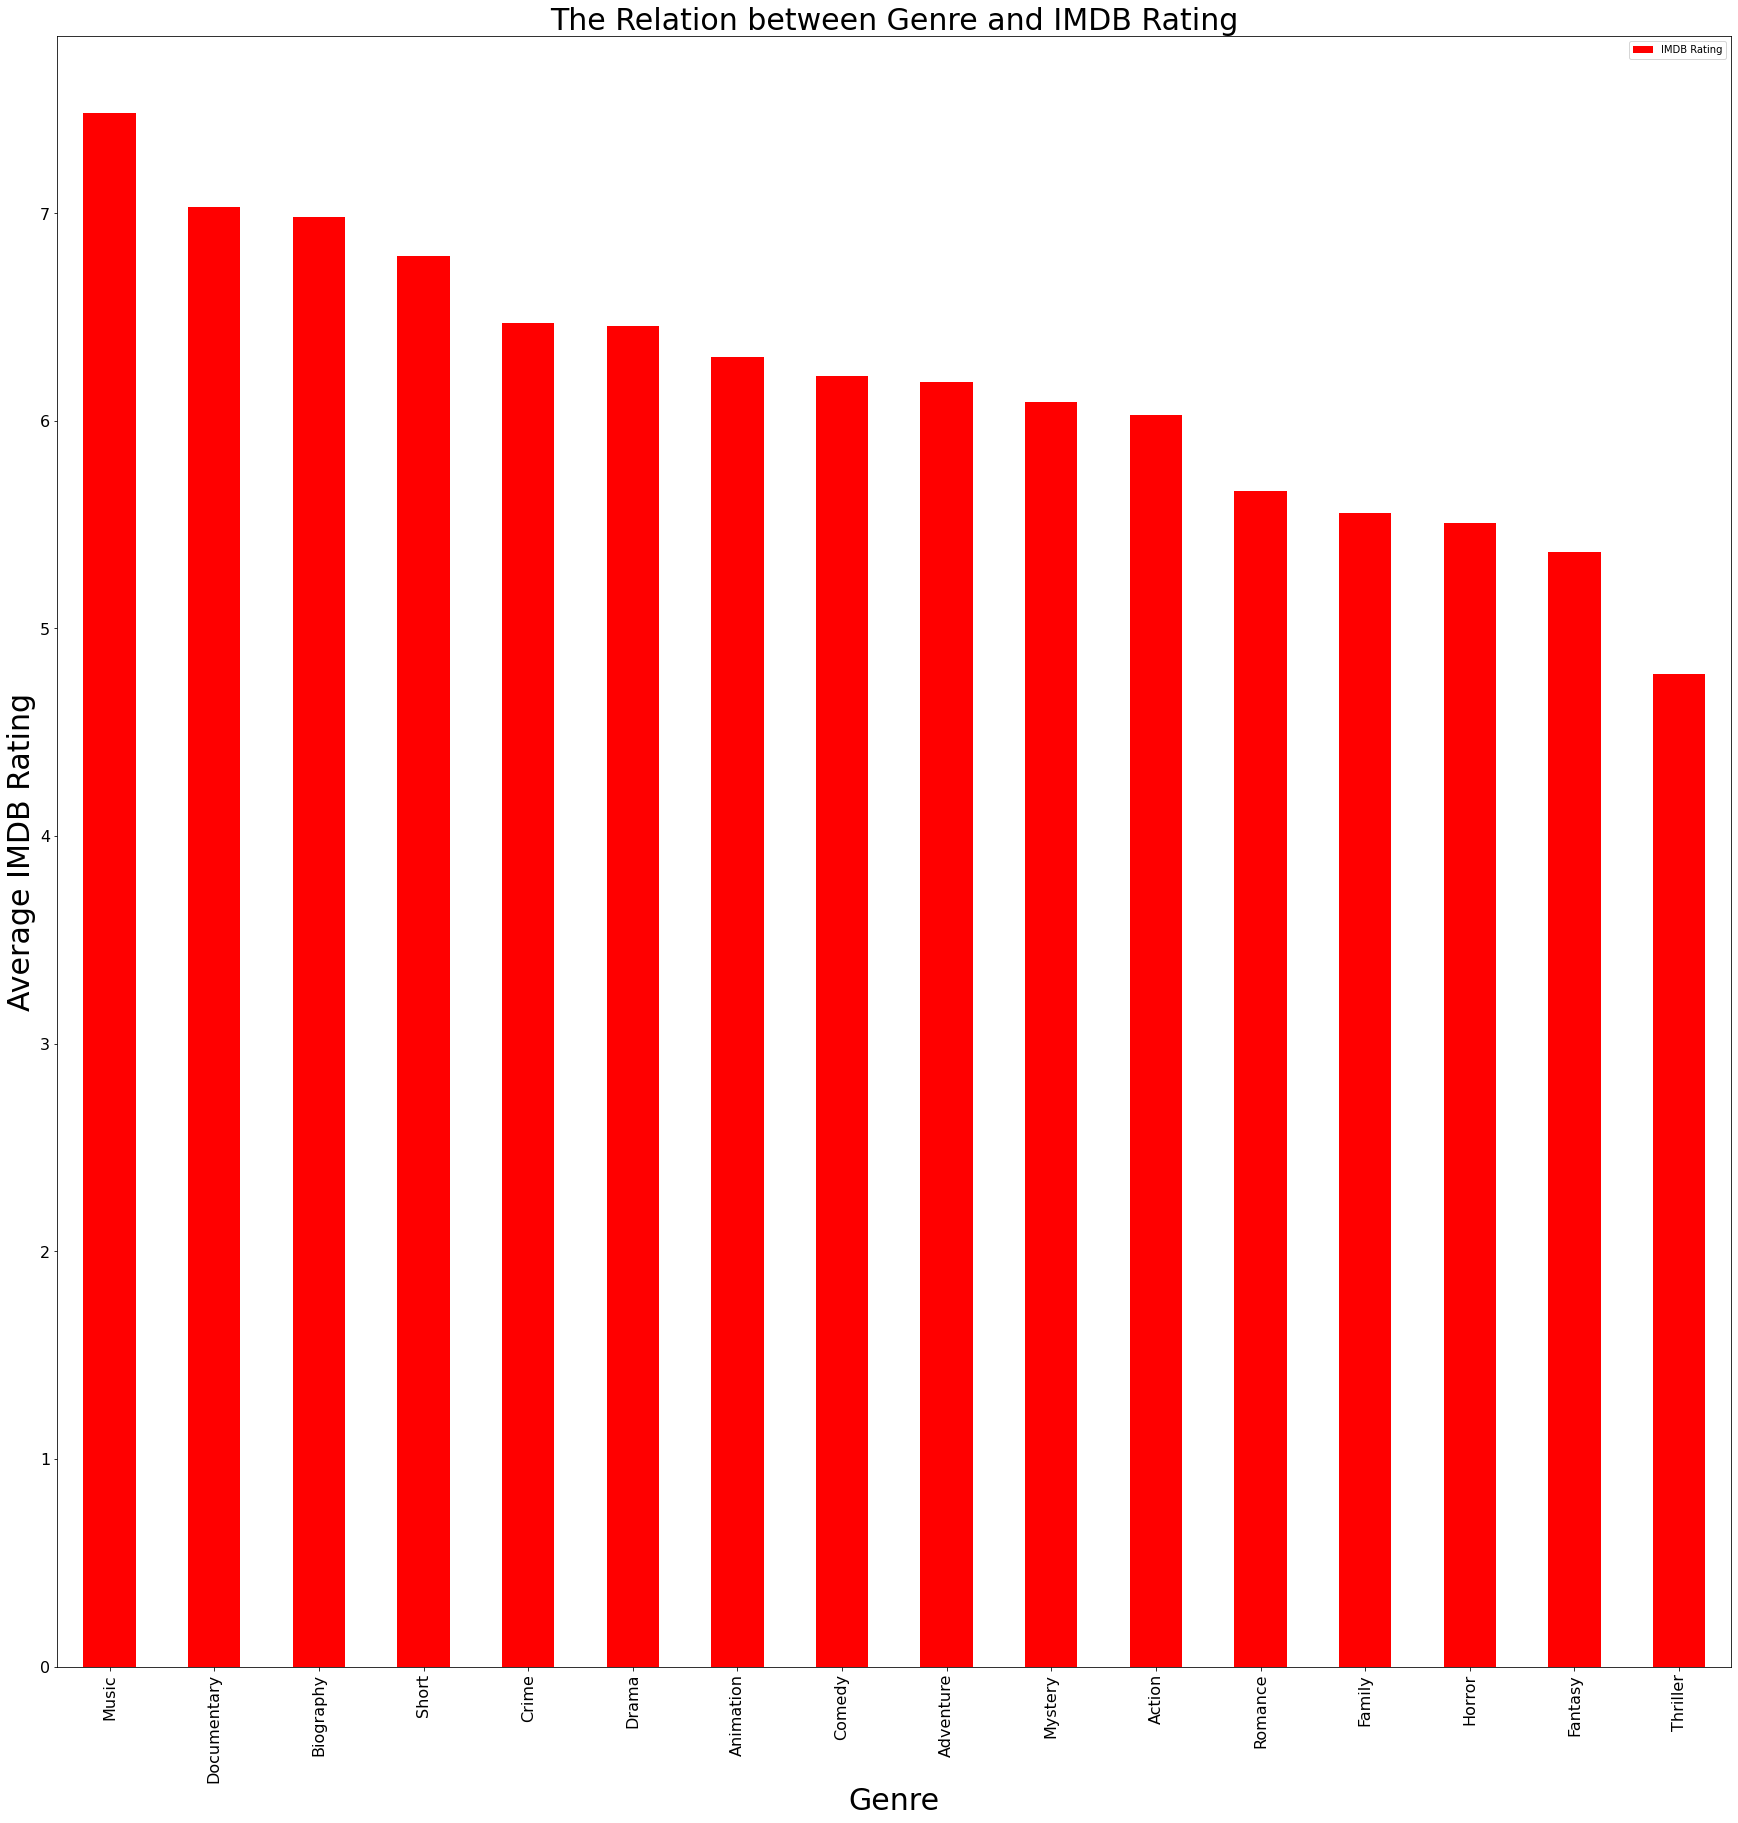

<Figure size 432x288 with 0 Axes>

In [9]:
#create a bar graph that displays each genre and its overall IMDB rating 
plotting_genre_averages= groups.plot.bar(figsize=(30,30),color='r', fontsize= 16)
groups
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Average IMDB Rating",fontsize = 30)
plt.title("The Relation between Genre and IMDB Rating",fontsize = 30)
plt.show()
plt.savefig("../Graph Folder/The Relation between Genre and IMDB Rating.png")

In [11]:
#discover the how many titles were producted per genre
genre_popularity= imdb_genre_df['Genres'].value_counts()
genre_popularity

Comedy         775
Action         529
Drama          509
Documentary    218
Animation      199
Crime          183
Biography      123
Horror         108
Adventure       90
Thriller        33
Family          21
Romance         13
Mystery         12
Short           11
Fantasy          6
Music            5
Name: Genres, dtype: int64

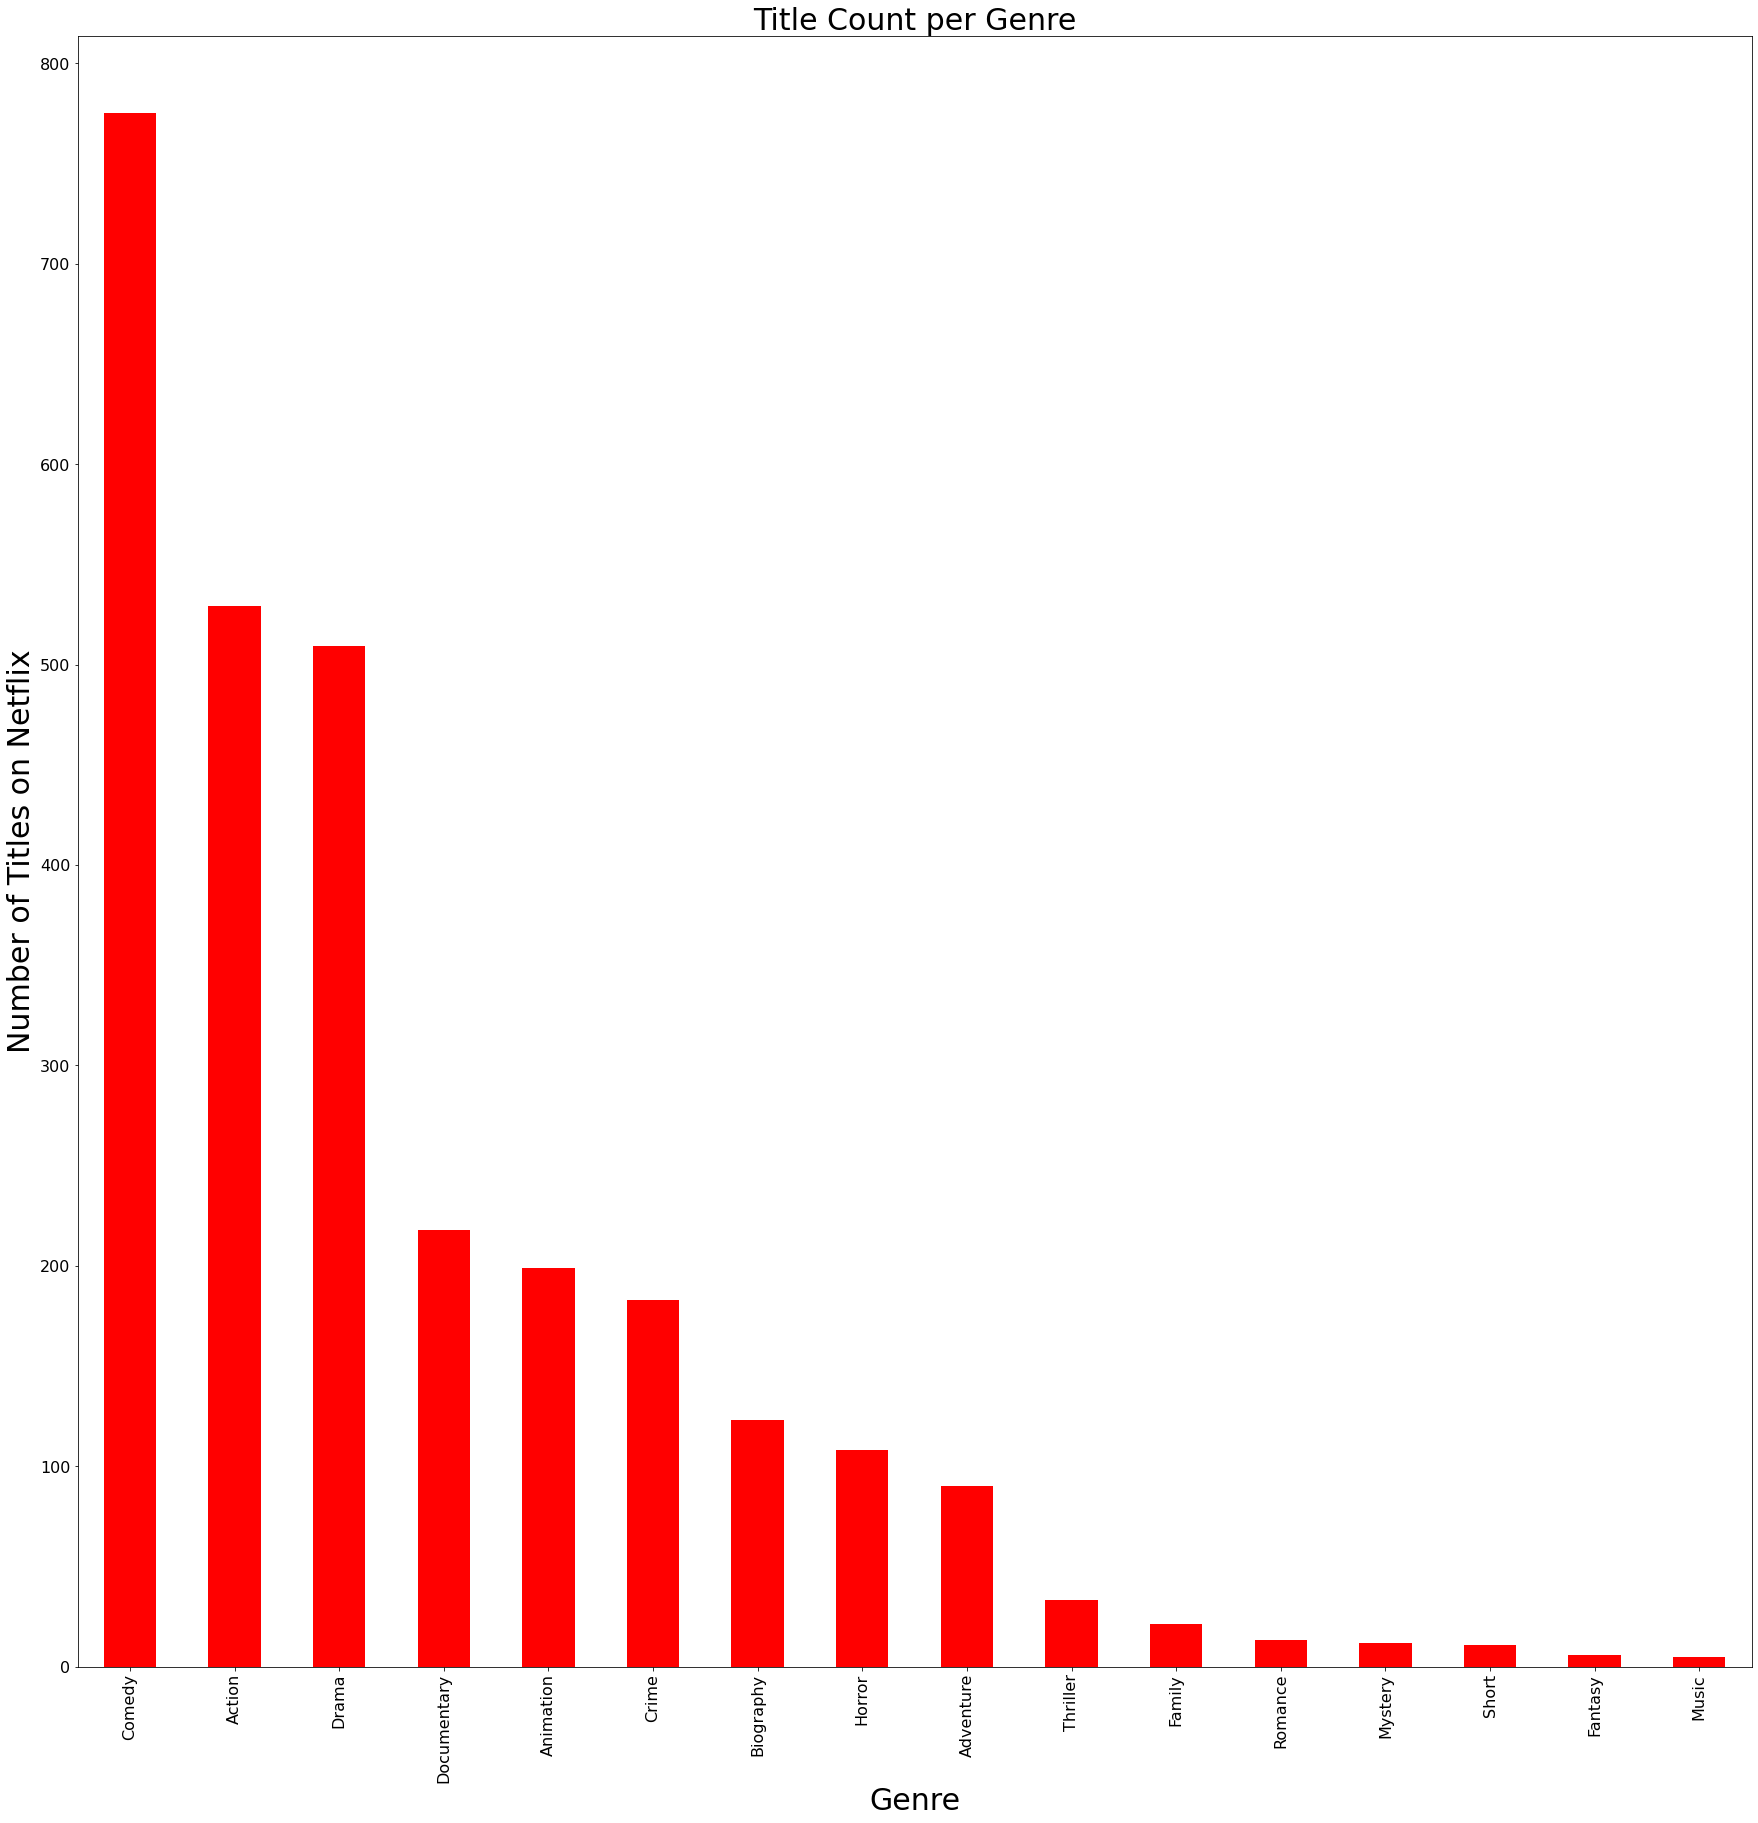

In [12]:
#graph your findings
plotting_genre_popularity= genre_popularity.plot.bar(figsize=(30,30),color='r', fontsize= 16)
genre_popularity
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Number of Titles on Netflix",fontsize = 30)
plt.title("Title Count per Genre",fontsize = 30)
plt.savefig("../Graph Folder/Title Count per Genre.png")
plt.show()


The graphs below will display the relationship between genre, ratings, and user ratings. Out of those top 5 genres we will find the amount of titles are classified under each rating (G, PG, PG13,R, NR, etc.)

In [40]:
#Create a new data frame only displaying the top 5 genres 
#Music(7.480000) 
#Documentary (7.031651)
#Biography (6.980488)
#Short (6.790909)
#Crime (6.469945)
#Do a groupby function to find each genre's average IMDB rating

music_group= imdb_genre_df[imdb_genre_df['Genres']== 'Music']
documentary_group= imdb_genre_df[imdb_genre_df['Genres']== 'Documentary']
biography_group= imdb_genre_df[imdb_genre_df['Genres']== 'Biography']
short_group= imdb_genre_df[imdb_genre_df['Genres']== 'Short']
crime_group= imdb_genre_df[imdb_genre_df['Genres']== 'Crime']


In [60]:
#Finding out how many of each rating is present in each top 5 genre
music_group['Rating'].value_counts()

TV-14        2
Not Rated    1
TV-PG        1
R            1
Name: Rating, dtype: int64

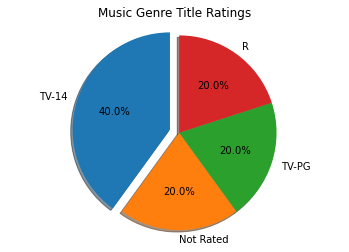

In [62]:
# Pie chart
labels = 'TV-14', 'Not Rated', 'TV-PG', 'R'
sizes = [2, 1, 1, 1]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Music Genre Title Ratings')
plt.savefig("../Graph Folder/Top 5 by rating Music.png")
plt.show()

In [35]:
documentary_group['Rating'].value_counts()

Not Rated    59
TV-MA        43
R            23
TV-14        22
PG-13        22
PG           16
TV-PG        14
Unrated       9
G             6
TV-G          1
Approved      1
E             1
GP            1
Name: Rating, dtype: int64

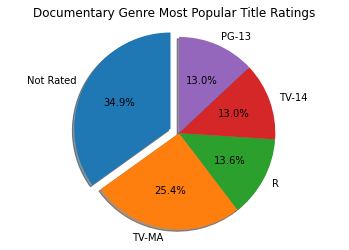

In [63]:
# Pie chart
labels = 'Not Rated', 'TV-MA', 'R', 'TV-14', 'PG-13'
sizes = [59, 43, 23, 22, 22]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Documentary Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by rating Documentary.png")
plt.show()

In [36]:
biography_group['Rating'].value_counts()

R            48
PG-13        29
Not Rated    15
PG           11
TV-MA         9
TV-14         6
TV-PG         3
Unrated       1
Approved      1
Name: Rating, dtype: int64

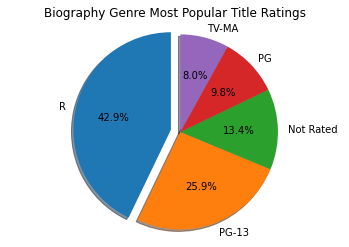

In [64]:
# Pie chart
labels = 'R', 'PG-13', 'Not Rated', 'PG', 'TV-MA'
sizes = [48, 29, 15, 11, 9]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Biography Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by rating Biography.png")
plt.show()

In [37]:
short_group['Rating'].value_counts()

Not Rated    6
TV-MA        2
TV-14        1
TV-G         1
R            1
Name: Rating, dtype: int64

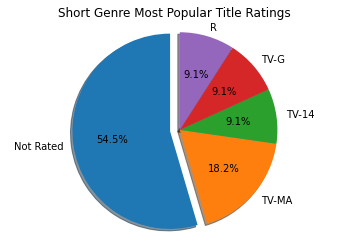

In [65]:
# Pie chart
labels = 'Not Rated', 'TV-MA', 'TV-14', 'TV-G', 'R'
sizes = [6, 2, 1, 1, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Short Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by rating Short.png")
plt.show()

In [42]:
crime_group['Rating'].value_counts()

R            74
Not Rated    46
TV-MA        29
PG-13         8
TV-14         6
Unrated       5
Passed        5
Approved      4
PG            2
TV-PG         1
X             1
GP            1
NOT RATED     1
Name: Rating, dtype: int64

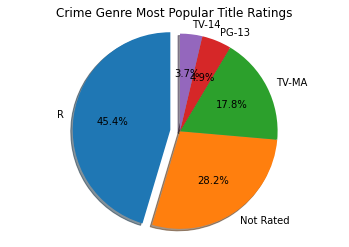

In [66]:
# Pie chart
labels = 'R', 'Not Rated', 'TV-MA', 'PG-13', 'TV-14'
sizes = [74, 46, 29, 8, 6]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Crime Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by rating Crime.png")
plt.show()

# OVERALL FINDINGS FOR THE TOP 5 GENRES & THEIR TITLE RATINGS (PG, PG-13, R, etc.)

In [43]:
print("HIGHEST SCORING GENRES AND THEIR MOST POPULAR RATING")
print("-------------------------")
print("Music: TV-14")
print("-------------------------")
print("Documentary: NA")
print("-------------------------")
print("Biography: R")
print("-------------------------")
print("Short: NA")
print("-------------------------")
print("Crime: R")
print("-------------------------")

HIGHEST SCORING GENRES AND THEIR MOST POPULAR RATING
-------------------------
Music: TV-14
-------------------------
Documentary: NA
-------------------------
Biography: R
-------------------------
Short: NA
-------------------------
Crime: R
-------------------------


Repeat the steps listed above, but instead of finding the most frequent title rating for the top 5 IMDB rated genres.....

We will now find the most frequent title rating for the 5 most produced genres

**It is interesting to note that only 1 genre overlaps for most highly rated and most frequently produced. And that genre is..... Documentary**

In [44]:
#Create a new data frame only displaying the top 5 most frequently produced genres 
#Comedy         775
#Action         529
#Drama          509
#Documentary    218
#Animation      199
#Do a groupby function to find each genre's average IMDB rating

comedy_group= imdb_genre_df[imdb_genre_df['Genres']== 'Comedy']
action_group= imdb_genre_df[imdb_genre_df['Genres']== 'Action']
drama_group= imdb_genre_df[imdb_genre_df['Genres']== 'Drama']
documentary_group= imdb_genre_df[imdb_genre_df['Genres']== 'Documentary']
animation_group= imdb_genre_df[imdb_genre_df['Genres']== 'Animation']

In [69]:
comedy_group['Rating'].value_counts()

TV-MA        193
Not Rated    166
R            139
PG-13        104
TV-14         50
PG            46
TV-PG         30
Unrated       20
TV-G          12
G              8
Approved       4
Passed         2
NC-17          1
Name: Rating, dtype: int64

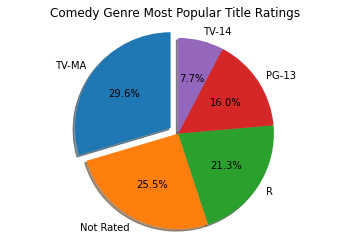

In [70]:
# Pie chart
labels = 'TV-MA', 'Not Rated', 'R', 'PG-13', 'TV-14'
sizes = [193, 166, 139, 104, 50]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comedy Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by frequency Comedy.png")
plt.show()

In [46]:
action_group['Rating'].value_counts()

R            175
Not Rated    147
PG-13        110
TV-MA         41
PG            23
TV-14         20
TV-PG          7
Passed         3
TV-Y7          1
Unrated        1
G              1
Name: Rating, dtype: int64

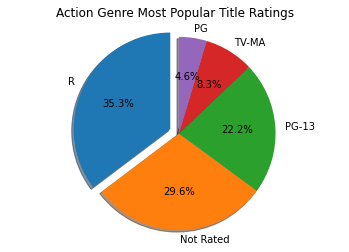

In [71]:
# Pie chart
labels = 'R', 'Not Rated', 'PG-13', 'TV-MA', 'PG'
sizes = [175, 147, 110, 41, 23]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Action Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by frequency Action.png")
plt.show()

In [47]:
drama_group['Rating'].value_counts()

R            136
Not Rated    123
PG-13         68
TV-MA         64
PG            37
TV-14         31
TV-PG         19
Unrated       18
Approved       5
G              3
TV-G           2
TV-Y7          1
NOT RATED      1
Passed         1
Name: Rating, dtype: int64

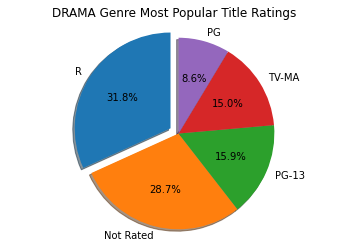

In [72]:
# Pie chart
labels = 'R', 'Not Rated', 'PG-13', 'TV-MA', 'PG'
sizes = [136, 123, 68, 64, 37]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('DRAMA Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by frequency Drama.png")
plt.show()

In [48]:
documentary_group['Rating'].value_counts()

Not Rated    59
TV-MA        43
R            23
TV-14        22
PG-13        22
PG           16
TV-PG        14
Unrated       9
G             6
TV-G          1
Approved      1
E             1
GP            1
Name: Rating, dtype: int64

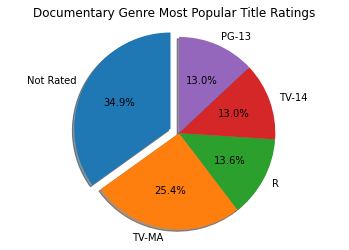

In [73]:
# Pie chart
labels = 'Not Rated', 'TV-MA', 'R', 'TV-14', 'PG-13'
sizes = [59, 43, 23, 22, 22]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Documentary Genre Most Popular Title Ratings')
plt.show()

In [49]:
animation_group['Rating'].value_counts()

PG           54
Not Rated    29
TV-Y7        27
G            27
TV-Y         20
PG-13         9
TV-14         8
TV-PG         7
TV-G          6
TV-MA         6
TV-Y7-FV      2
Unrated       2
R             2
Name: Rating, dtype: int64

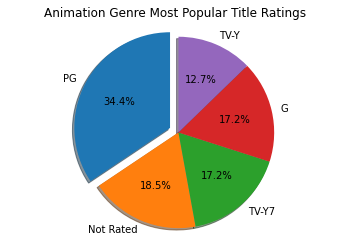

In [74]:
# Pie chart
labels = 'PG', 'Not Rated', 'TV-Y7', 'G', 'TV-Y'
sizes = [54,29, 27, 27, 20]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Animation Genre Most Popular Title Ratings')
plt.savefig("../Graph Folder/Top 5 by frequency Animation.png")
plt.show()

# OVERALL FINDINGS FOR THE TOP 5 MOST PRODUCED GENRES & THEIR TITLE RATINGS (PG, PG-13, R, etc.)¶

In [75]:
print("MOST FREQUENTLY PRODUCED GENRES AND THEIR MOST POPULAR RATING")
print("-------------------------")
print("Comedy: TV-MA")
print("-------------------------")
print("Action: R")
print("-------------------------")
print("Drama: R")
print("-------------------------")
print("Documentary: NA")
print("-------------------------")
print("Animation: PG")
print("-------------------------")

MOST FREQUENTLY PRODUCED GENRES AND THEIR MOST POPULAR RATING
-------------------------
Comedy: TV-MA
-------------------------
Action: R
-------------------------
Drama: R
-------------------------
Documentary: NA
-------------------------
Animation: PG
-------------------------


In [19]:
#making df for each genre for statsical visualization 
comedy_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Comedy']
music_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Music']
doc_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Documentary']

<function matplotlib.pyplot.show(close=None, block=None)>

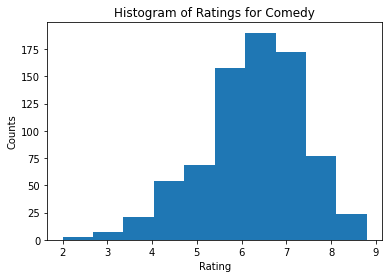

In [32]:
#comedy distribution
comedy_rating = comedy_df["IMDB Rating"]
plt.hist(comedy_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Comedy")
plt.savefig('comedy ratings histogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

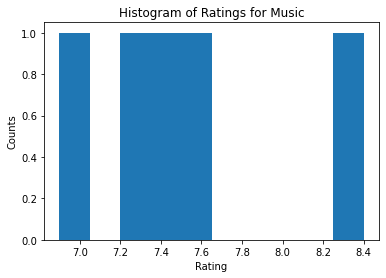

In [33]:
#music distribution
music_rating = music_df["IMDB Rating"]
plt.hist(music_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Music")
plt.savefig('music ratings histogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

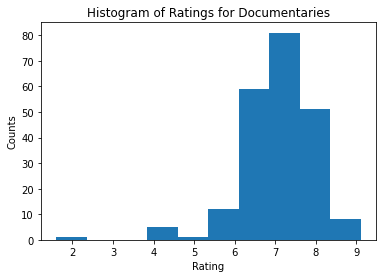

In [34]:
#doc distribution
doc_rating = doc_df["IMDB Rating"]
plt.hist(doc_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Documentaries")
plt.savefig('doc ratings histogram')
plt.show